In [55]:
import numpy as np
#import pandas as pd
import matplotlib.pyplot as plt
import openslide
from openslide import open_slide
from openslide.deepzoom import DeepZoomGenerator
import os
import cv2
import random
import pickle

In [ ]:
#22042023_CALR_seg_megs.ipynb

In [28]:
#take each meg location in ihc and create the corresponsing 512x512 image in the HE

path = "/well/rittscher/users/qdv200/MPN/processed_CALR_IHC_megs/registered_CALR_segs"
image = "bET-CALR"
pickle_file = "bET-CALR.p"

In [29]:
new_path = os.path.join(path, pickle_file)

with open(new_path, 'rb') as handle:
    dict = pickle.load(handle)

In [20]:
cv2.imwrite(os.path.join(path, "0.png"), dict[0]["ihc_img"])

True

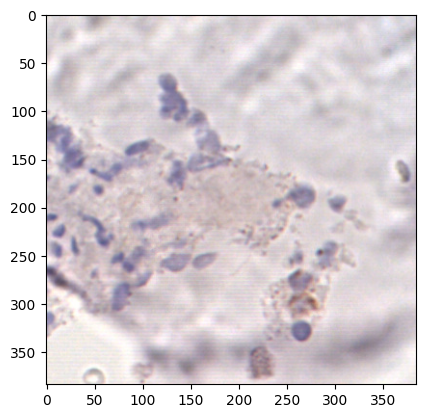

In [21]:
# a = cv2.imread(os.path.join(path, "0.png"))
# plt.imshow(a)

In [23]:
#just use the files for nowwhich are 384x384

#for each key in dictionary get the ihc_img and the he_img and save them to two folders

#first get the ihc_img
for key in dict.keys():
    ihc_img = dict[key]['ihc_img']
    he_img = dict[key]['he_img']

    ihc_img_path = os.path.join(path, image, "ihc_img", str(key) + ".png")
    he_img_path = os.path.join(path, image, "he_img", str(key) + ".png")
    
    
    cv2.imwrite(ihc_img_path, ihc_img)
    cv2.imwrite(he_img_path, he_img)   

In [25]:
#80 20 split for train and test

#list all files in the ihc_img folder
ihc_img_path = os.path.join(path, image, "ihc_img")
he_img_path = os.path.join(path, image, "he_img")

ihc_img_files = os.listdir(ihc_img_path)
he_img_files = os.listdir(he_img_path)

#randomly select 80% of the files for train and 20% for test
train_img_files = random.sample(ihc_img_files, int(len(ihc_img_files)*0.8))

#remove the train files from the list of all files to get the test files
test_img_files = [x for x in ihc_img_files if x not in train_img_files]

#move the train files to a new folder using python
train_ihc_img_path = os.path.join(path,  "ihc2he/trainA")  
train_he_img_path = os.path.join(path, "ihc2he/trainB")

test_ihc_img_path = os.path.join(path, "ihc2he/testA")
test_he_img_path = os.path.join(path, "ihc2he/testB")

for file in train_img_files:
    ihc_img = cv2.imread(os.path.join(ihc_img_path, file))
    he_img = cv2.imread(os.path.join(he_img_path, file))
    
    cv2.imwrite(os.path.join(train_ihc_img_path, file), ihc_img)
    cv2.imwrite(os.path.join(train_he_img_path, file), he_img)

for file in test_img_files:
    ihc_img = cv2.imread(os.path.join(ihc_img_path, file))
    he_img = cv2.imread(os.path.join(he_img_path, file))
    
    cv2.imwrite(os.path.join(test_ihc_img_path, file), ihc_img)
    cv2.imwrite(os.path.join(test_he_img_path, file), he_img)



In [26]:
#check that the list of files in trainA is the same as trainB
trainA_files = os.listdir(train_ihc_img_path)
trainB_files = os.listdir(train_he_img_path)

#check trainA and trainB have the same files
for file in trainA_files:
    if file not in trainB_files:
        print("file not in trainB", file)

#check trainB and trainA have the same files
for file in trainB_files:
    if file not in trainA_files:
        print("file not in trainA", file)


##### now instead I want to get 512 x 512 from bET

In [32]:
dict[0].keys()

dict_keys(['ihc', 'he', 'seg', 'ihc_img', 'dab_status', 'he_img'])

In [33]:
dict[key]['ihc']

[53680.889003, 15183.200393]

In [49]:
ndpi_image = "/well/rittscher/users/qdv200/MPN/HE-IHC-BMT"

ihc_img = open_slide(os.path.join(ndpi_image, "b-ET-CALR-2021-02-19-11-12-00.ndpi"))
#ihc_img.get_thumbnail((1000,1000))
he_img = open_slide(os.path.join(ndpi_image, "b-ET-2021-02-08-12-25-45-CALR.ndpi"))


In [50]:
#for each key in dictionary get the meg location and then the 512x512 image with the meg at the center

#first get the ihc_img
for key in dict.keys():
    ihc = dict[key]['ihc']
    he = dict[key]['he']

    ihc_tl = (int(ihc[0] - 256), int(ihc[1] - 256))
    he_tl = (int(he[0] - 256), int(he[1] - 256))

    ihc_patch = ihc_img.read_region(ihc_tl, 0, (512,512))
    he_patch = he_img.read_region(he_tl, 0, (512,512))

    ihc_patch = np.array(ihc_patch)
    he_patch = np.array(he_patch)

    ihc_img_path = os.path.join(path, image, "ihc_img", image + "_" + str(key) + ".png")
    he_img_path = os.path.join(path, image, "he_img", image + "_" + str(key) + ".png")
    
    cv2.imwrite(ihc_img_path, ihc_patch)
    cv2.imwrite(he_img_path, he_patch) 

In [51]:
#80 20 split for train and test

#list all files in the ihc_img folder
ihc_img_path = os.path.join(path, image, "ihc_img")
he_img_path = os.path.join(path, image, "he_img")

ihc_img_files = os.listdir(ihc_img_path)
he_img_files = os.listdir(he_img_path)

#randomly select 80% of the files for train and 20% for test
train_img_files = random.sample(ihc_img_files, int(len(ihc_img_files)*0.8))

#remove the train files from the list of all files to get the test files
test_img_files = [x for x in ihc_img_files if x not in train_img_files]

#move the train files to a new folder using python
train_ihc_img_path = os.path.join(path,  "ihc2he/trainA")  
train_he_img_path = os.path.join(path, "ihc2he/trainB")

test_ihc_img_path = os.path.join(path, "ihc2he/testA")
test_he_img_path = os.path.join(path, "ihc2he/testB")

for file in train_img_files:
    ihc_img = cv2.imread(os.path.join(ihc_img_path, file))
    he_img = cv2.imread(os.path.join(he_img_path, file))
    
    cv2.imwrite(os.path.join(train_ihc_img_path, file), ihc_img)
    cv2.imwrite(os.path.join(train_he_img_path, file), he_img)

for file in test_img_files:
    ihc_img = cv2.imread(os.path.join(ihc_img_path, file))
    he_img = cv2.imread(os.path.join(he_img_path, file))
    
    cv2.imwrite(os.path.join(test_ihc_img_path, file), ihc_img)
    cv2.imwrite(os.path.join(test_he_img_path, file), he_img)

TypeError: 'NoneType' object is not subscriptable

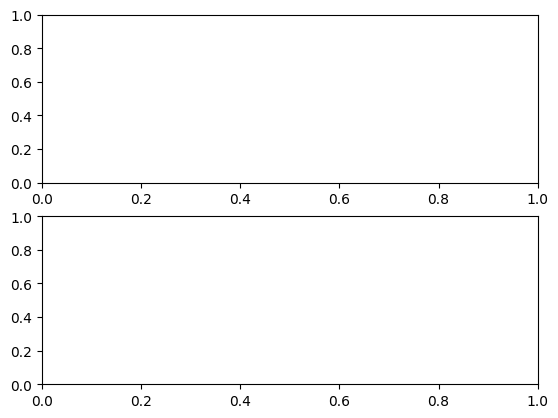

In [54]:
#check that the image in trainA is the same as trainB by plotting images with the same name

trainA_files = os.listdir(train_ihc_img_path)
trainB_files = os.listdir(train_he_img_path)

trainA = trainA_files.sort()
trainB = trainB_files.sort()

#create subplots

fig, axs = plt.subplots(2, 1)
axs[0].imshow(cv2.imread(os.path.join(train_ihc_img_path, trainA[0])))  
axs[0].set_title('trainA')
axs[1].imshow(cv2.imread(os.path.join(train_he_img_path, trainB[0])))
axs[1].set_title('trainB')

fig.tight_layout()
fig.show()




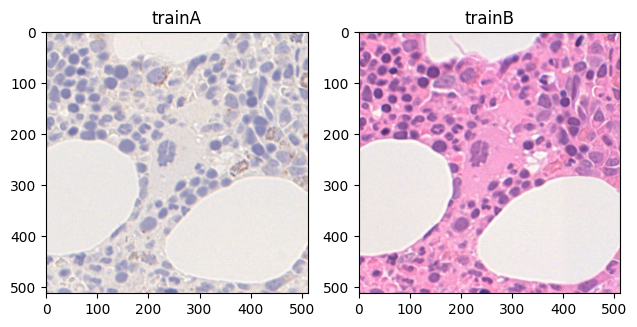

In [65]:
import matplotlib.pyplot as plt
import cv2
import os

i = 670

# Create subplots
fig, axs = plt.subplots(1, 2)
axs[0].imshow(cv2.imread(os.path.join(train_ihc_img_path, trainA_files[i])))
axs[0].set_title('trainA')
axs[1].imshow(cv2.imread(os.path.join(train_he_img_path, trainB_files[i])))
axs[1].set_title('trainB')

fig.tight_layout()
plt.show()


In [61]:
trainB_files

['bET-CALR_0.png',
 'bET-CALR_10.png',
 'bET-CALR_100.png',
 'bET-CALR_1000.png',
 'bET-CALR_1004.png',
 'bET-CALR_1005.png',
 'bET-CALR_1006.png',
 'bET-CALR_1007.png',
 'bET-CALR_1008.png',
 'bET-CALR_1009.png',
 'bET-CALR_101.png',
 'bET-CALR_1010.png',
 'bET-CALR_1011.png',
 'bET-CALR_1012.png',
 'bET-CALR_1014.png',
 'bET-CALR_1015.png',
 'bET-CALR_1016.png',
 'bET-CALR_1017.png',
 'bET-CALR_1018.png',
 'bET-CALR_1019.png',
 'bET-CALR_102.png',
 'bET-CALR_1020.png',
 'bET-CALR_1022.png',
 'bET-CALR_1023.png',
 'bET-CALR_1024.png',
 'bET-CALR_1025.png',
 'bET-CALR_1026.png',
 'bET-CALR_1027.png',
 'bET-CALR_1028.png',
 'bET-CALR_1029.png',
 'bET-CALR_103.png',
 'bET-CALR_1030.png',
 'bET-CALR_1032.png',
 'bET-CALR_1033.png',
 'bET-CALR_1035.png',
 'bET-CALR_1037.png',
 'bET-CALR_1039.png',
 'bET-CALR_104.png',
 'bET-CALR_1040.png',
 'bET-CALR_1042.png',
 'bET-CALR_1043.png',
 'bET-CALR_1044.png',
 'bET-CALR_1045.png',
 'bET-CALR_1046.png',
 'bET-CALR_1048.png',
 'bET-CALR_1049.png'